# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

There are two main approaches for enterprises to promote
products and/or services: through mass campaigns,
targeting general indiscriminate public or directed
marketing, targeting a specific set of contacts.

In this paper, Data Mining (DM) approach has been used for
bank direct marketing campaigns.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import sys

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pylab as plt
from imblearn.over_sampling import SMOTE

#import os
#from google.colab import drive
#drive.mount('/content/drive')
#os.chdir('/content/drive/MyDrive/ColabNotebooks/')


import warnings
warnings.filterwarnings('ignore')
from sklearn import set_config
set_config(display="diagram")

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')
df_orig=df
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



Panda Profiling will provide detailed information about different fields in the input data

In [4]:
#%pip install pandas-profiling
#%pip install ydata-profiling
#
#from ydata_profiling import ProfileReport
#%pip install category_encoders
#run the profile report
#profile = ProfileReport(df)
#profile.to_file(output_file='data/output.html')
#profile

Understand the data using histogram and other plots. In addition, identify the outliers

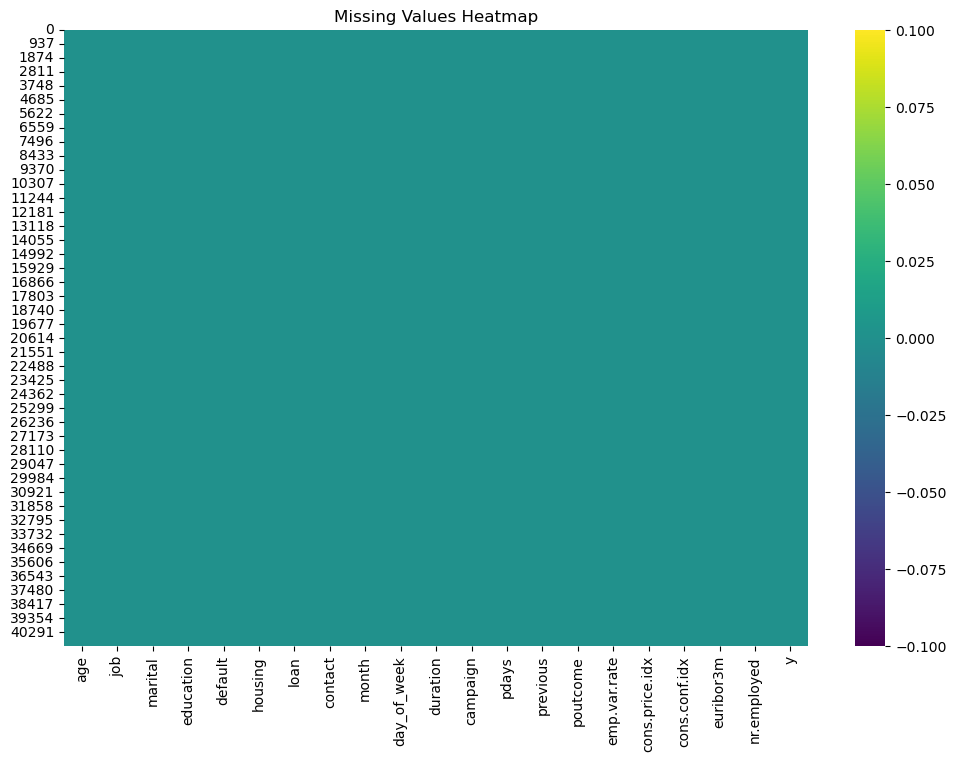

In [5]:
# Display if there are any missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.savefig('images/missing_values_before.png')
plt.show()

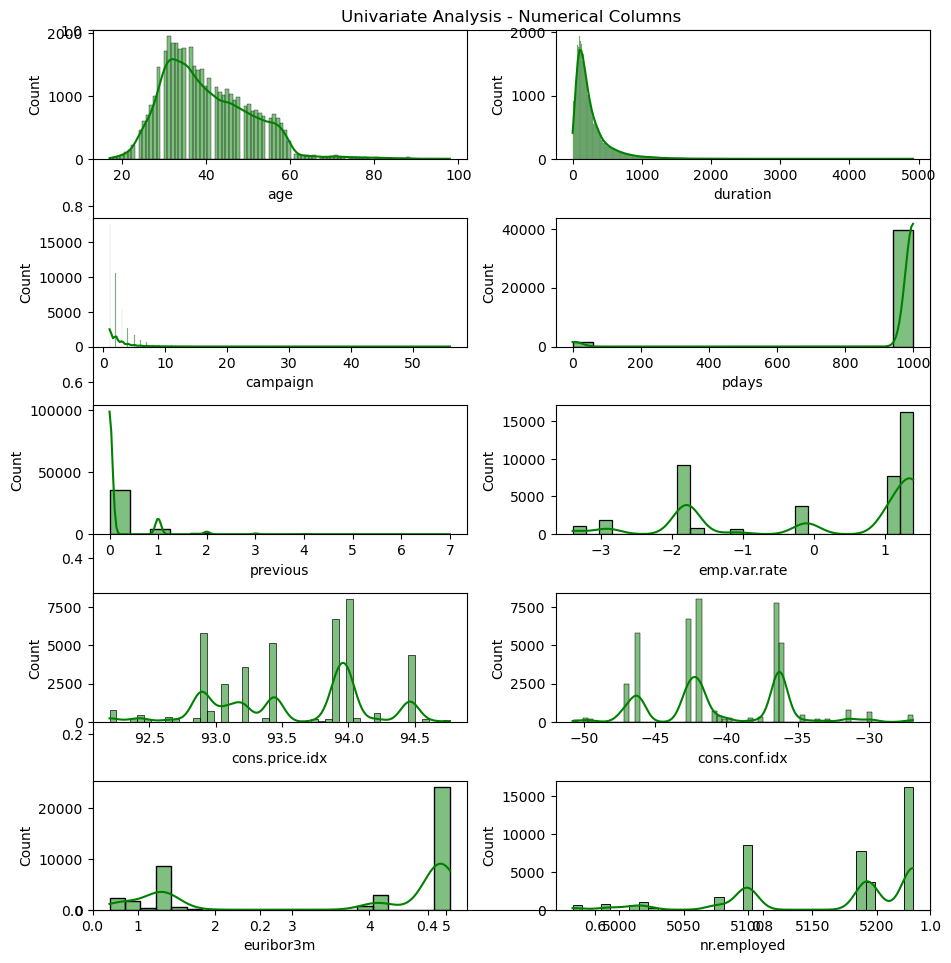

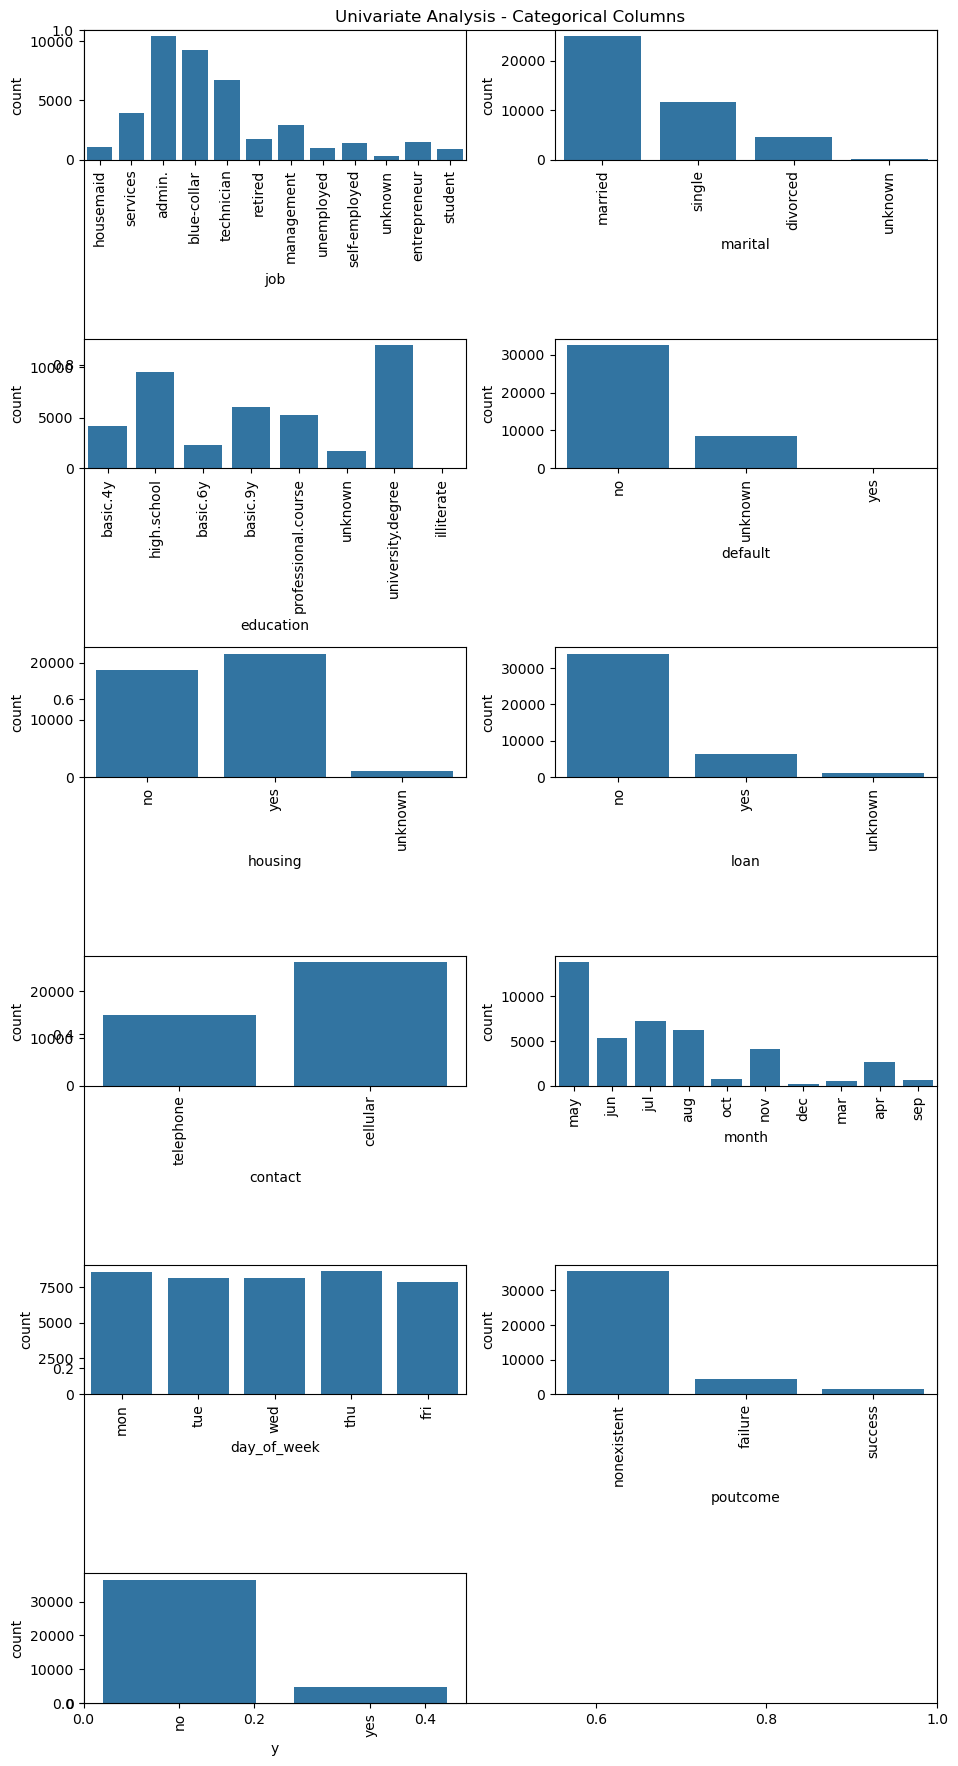

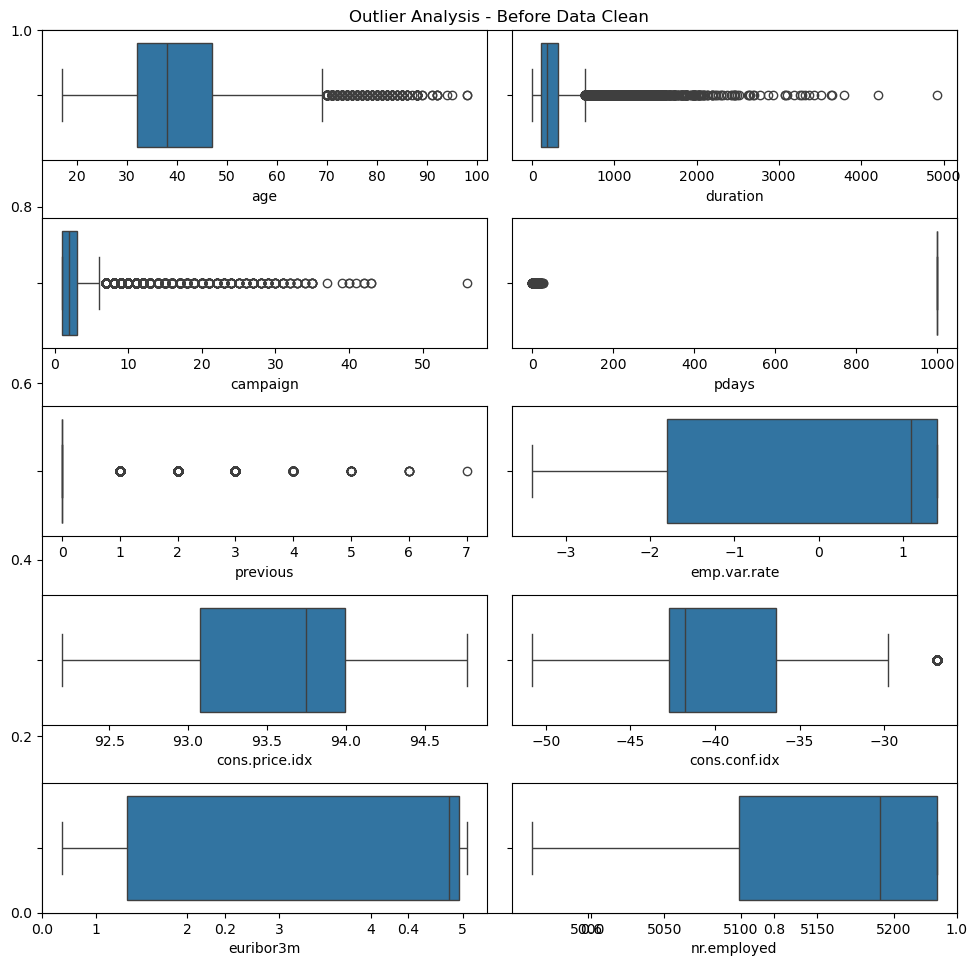

In [6]:



numerical_cols = ''

numerical_cols = df.select_dtypes(include=[np.number])
categorical_cols = df.select_dtypes(exclude=[np.number])


plt.figure(figsize=(10,10))                                         # set the canvas size
plt.title ('Univariate Analysis - Numerical Columns')
plotnumber = 1                                                      # create a variable for plotting numbers
for i in numerical_cols :                                                    # use for loop to iterate the loop
    plt.subplot(5,2,plotnumber)                                     # use subplot to plot figure in rows & columns
    sns.histplot(x = numerical_cols[i],color='green',kde=True)                # plot Histogram
    plotnumber = plotnumber + 1
plt.tight_layout()
plt.savefig('images/numvar-analysis.png')
plt.show()

plt.figure(figsize=(10,18))                                         # set the canvas size
plt.title ('Univariate Analysis - Categorical Columns')

plotnumber = 1
for i in categorical_cols :                                                    # use for loop to iterate the loop
    plt.subplot(6,2,plotnumber)                                     # use subplot to plot figure in rows & columns
    sns.countplot(x = categorical_cols[i])                                     # plot countplot
    plotnumber = plotnumber + 1
    plt.xticks(rotation=90)
plt.tight_layout()                                                  # to avoid the overlapping
plt.savefig('images/catvar-analysis.png')
plt.show()
# outlier checking

plt.figure(figsize=(10,10))            # canvas size
plt.title ('Outlier Analysis - Before Data Clean')
plotnumber = 1                        # variable
for i in numerical_cols:                        # use for loop
    plt.subplot(5,2,plotnumber)    # set number of rows & columns
    sns.boxplot(x=numerical_cols[i])        # use Box-plot to see outlier
    plotnumber = plotnumber + 1
plt.tight_layout()               # to ignore overlapping
plt.savefig('images/outliers-before.png')



Bivariate Analysis to understand the correlation

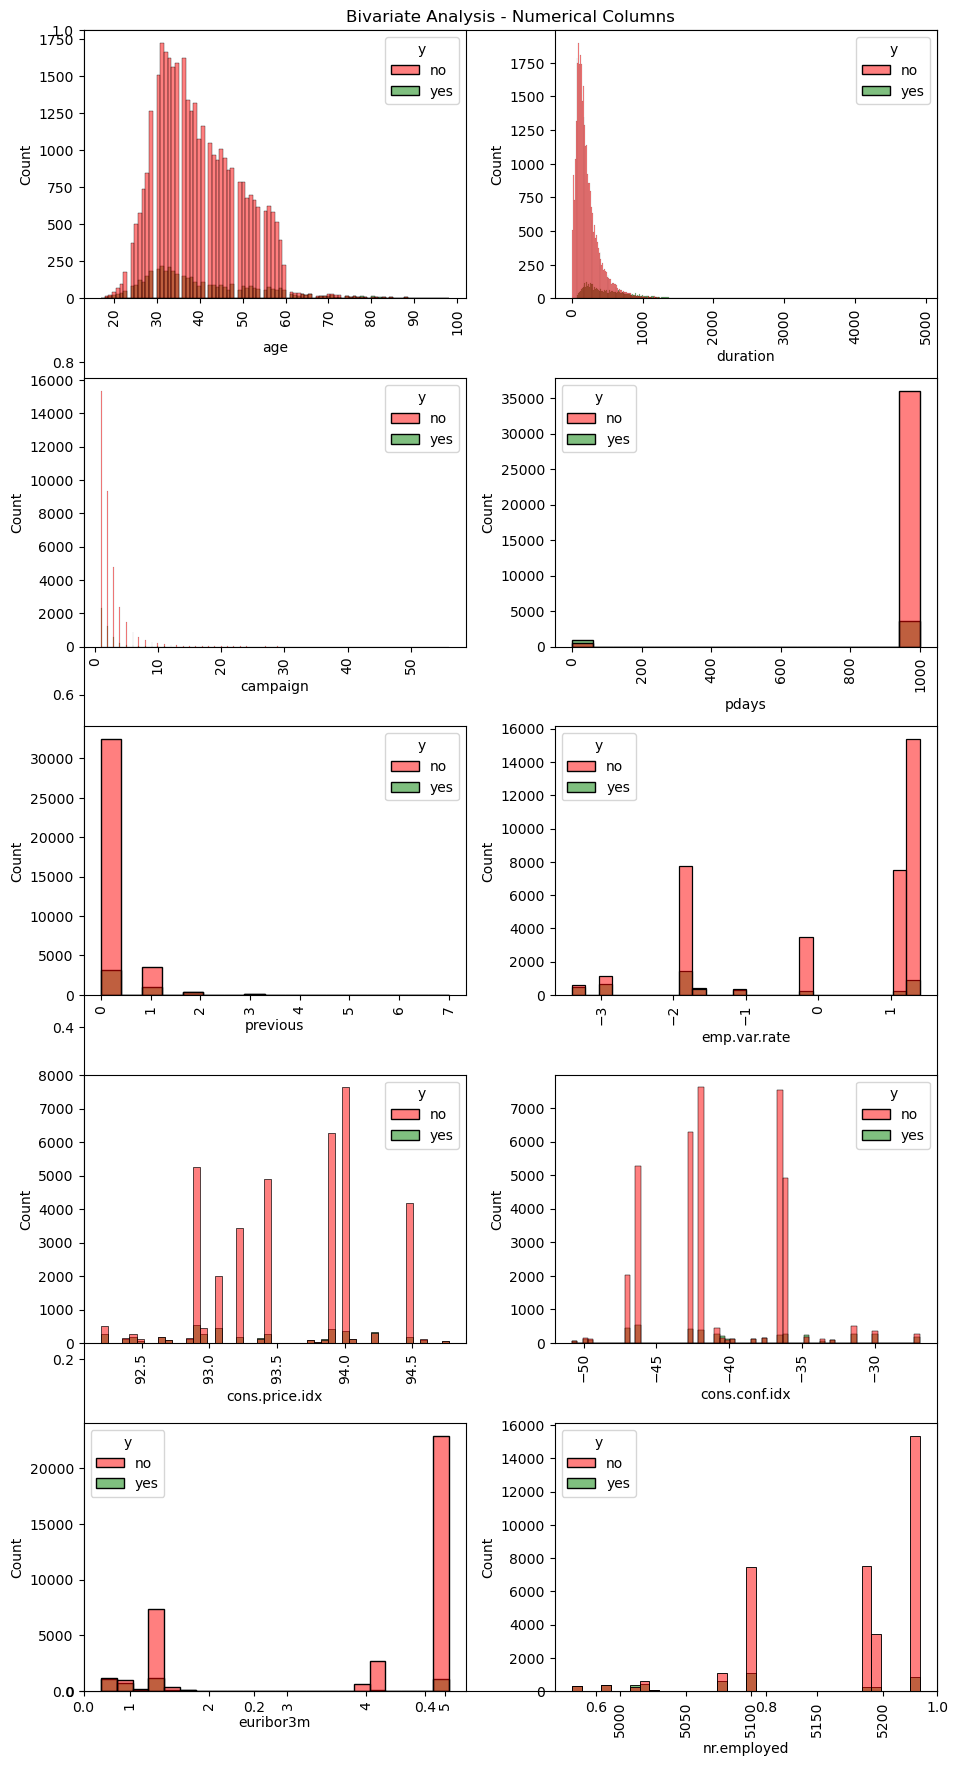

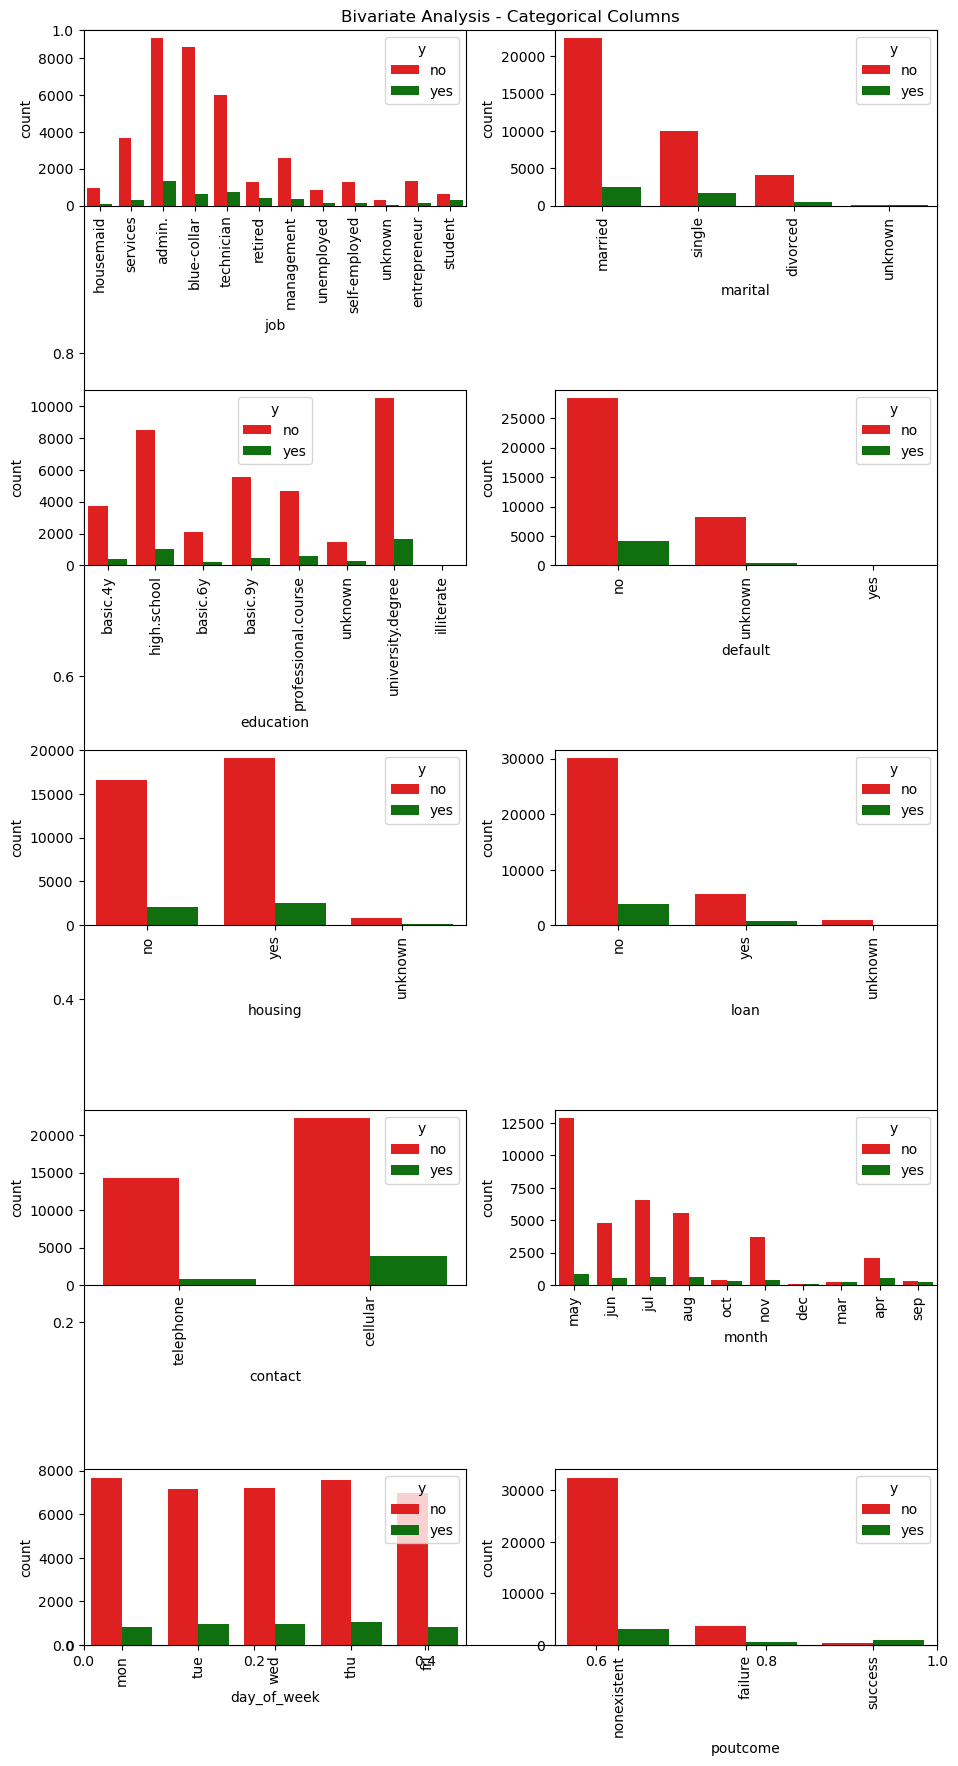

In [7]:
#Bivariate Analysis
## Bivariate analysis for Numerical Columns

plt.figure(figsize=(10,18))                                         # set the canvas size
plt.title ('Bivariate Analysis - Numerical Columns')
plotnumber = 1                                                      # create a variable for plotting numbers
for i in numerical_cols :                                                    # use for loop to iterate the loop
    plt.subplot(5,2,plotnumber)                                     # use subplot to plot figure in rows & columns
    sns.histplot(x = numerical_cols[i],hue=df.y,palette=['red', 'green'])       # plot Histogram with Target
    plotnumber = plotnumber + 1
    plt.xticks(rotation=90)
plt.tight_layout()                                                  # to avoid the overlapping
plt.savefig('images/bivariate-Num.png')


## Bivariate analysis for Categorical Columns
plt.figure(figsize=(10,18))                                         # set the canvas size
plt.title ('Bivariate Analysis - Categorical Columns')
plotnumber = 1                                                      # create a variable for plotting numbers
for i in categorical_cols.drop('y',axis=1) :                                   # use for loop to iterate the loop
    plt.subplot(5,2,plotnumber)                                     # use subplot to plot figure in rows & columns
    sns.countplot(x = categorical_cols[i],hue=df.y,palette=['r', 'g'])       # plot Countplot with Target class
    plotnumber = plotnumber + 1
    plt.xticks(rotation=90)
plt.tight_layout()                                                  # to avoid the overlapping
plt.savefig('images/bivariate-Cat.png')

Data cleaning and removing outliers

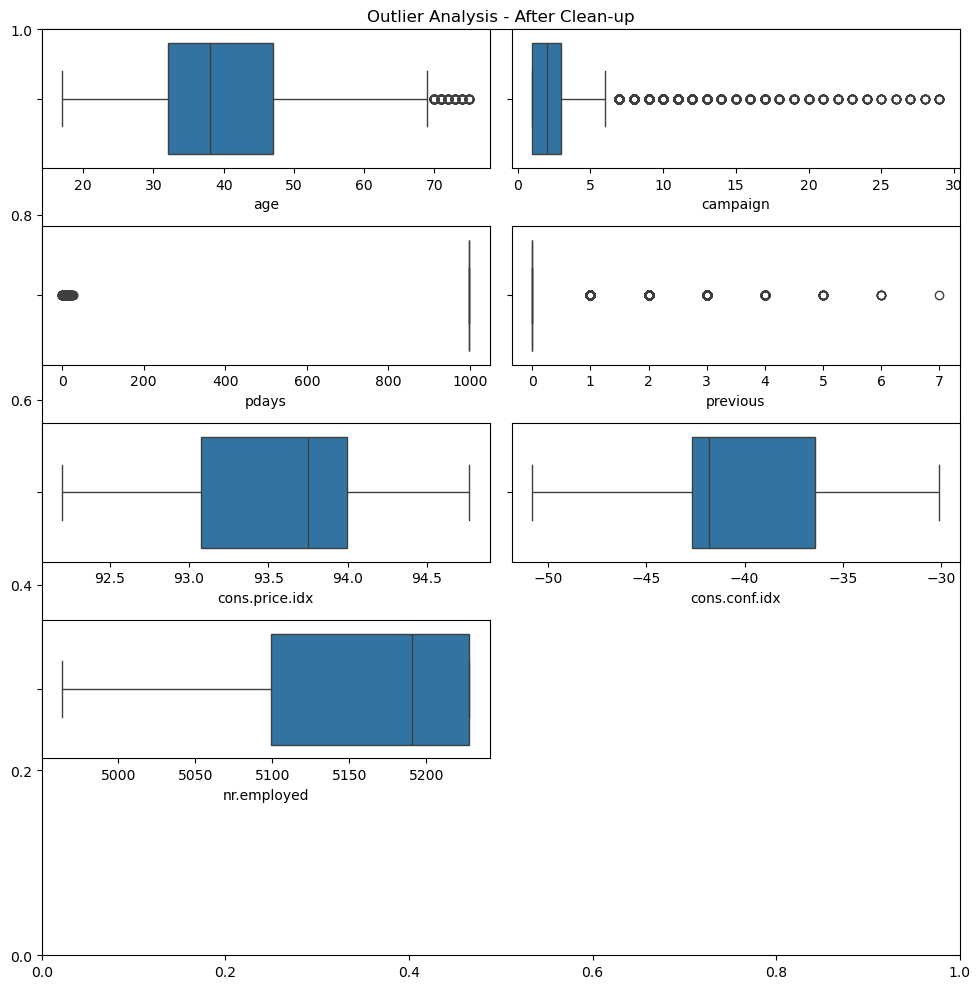

In [8]:

# Remove duplicate rows ( From the profile, ~12 duplicate rows in the dataframe)
df=df_orig

df.dropna()
df.drop_duplicates(inplace=True)
#Duration has -ve correlation. Drop it
df.drop('duration', axis=1, inplace=True)
df.drop('emp.var.rate', axis=1, inplace=True)
df.drop('euribor3m', axis=1, inplace=True)

df.loc[df['age']>75,'age'] = df.age.median()
df.loc[df['campaign'] > 29,'campaign'] = df.campaign.median()
df.loc[df['cons.conf.idx'] >-30,'cons.conf.idx'] = df['cons.conf.idx'].median()

numerical_cols = df.select_dtypes(include=[np.number])

#Rechecking the outliers
# outlier checking

plt.figure(figsize=(10,10))            # canvas size
plt.title ('Outlier Analysis - After Clean-up')
plotnumber = 1                        # variable
for i in numerical_cols:                        # use for loop
    plt.subplot(5,2,plotnumber)    # set number of rows & columns
    sns.boxplot(x=numerical_cols[i])        # use Box-plot to see outlier
    plotnumber = plotnumber + 1
plt.tight_layout()               # to ignore overlapping

plt.savefig('images/outliers-after.png')

A label encoder is used to convert categorical data (text values) into numerical values, allowing machine learning models to process and analyze categorical features, as most algorithms require numerical input; it's a crucial data pre-processing step to make categorical data compatible with machine learning models.

In [9]:
print(df.isnull().sum())

# Label encoding of categorical data
categorical_attributes = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome','y']
value_counts = df[categorical_attributes].nunique()
print("Value Counts of Categorical Attributes:")
print(value_counts)


from sklearn.preprocessing import LabelEncoder      # import Label Encoder to Convert Catregorical data to Numerical
lc = LabelEncoder()                                 # Create a Label Encoder Variable

for i in categorical_attributes:
    df[i] = lc.fit_transform(df[i])
df.head()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
cons.price.idx    0
cons.conf.idx     0
nr.employed       0
y                 0
dtype: int64
Value Counts of Categorical Attributes:
job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,93.994,-36.4,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,93.994,-36.4,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,93.994,-36.4,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,93.994,-36.4,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,93.994,-36.4,5191.0,0


A correlation heatmap is used to visually represent the strength and direction of relationships between multiple variables in a dataset, allowing you to quickly identify which variables are strongly correlated

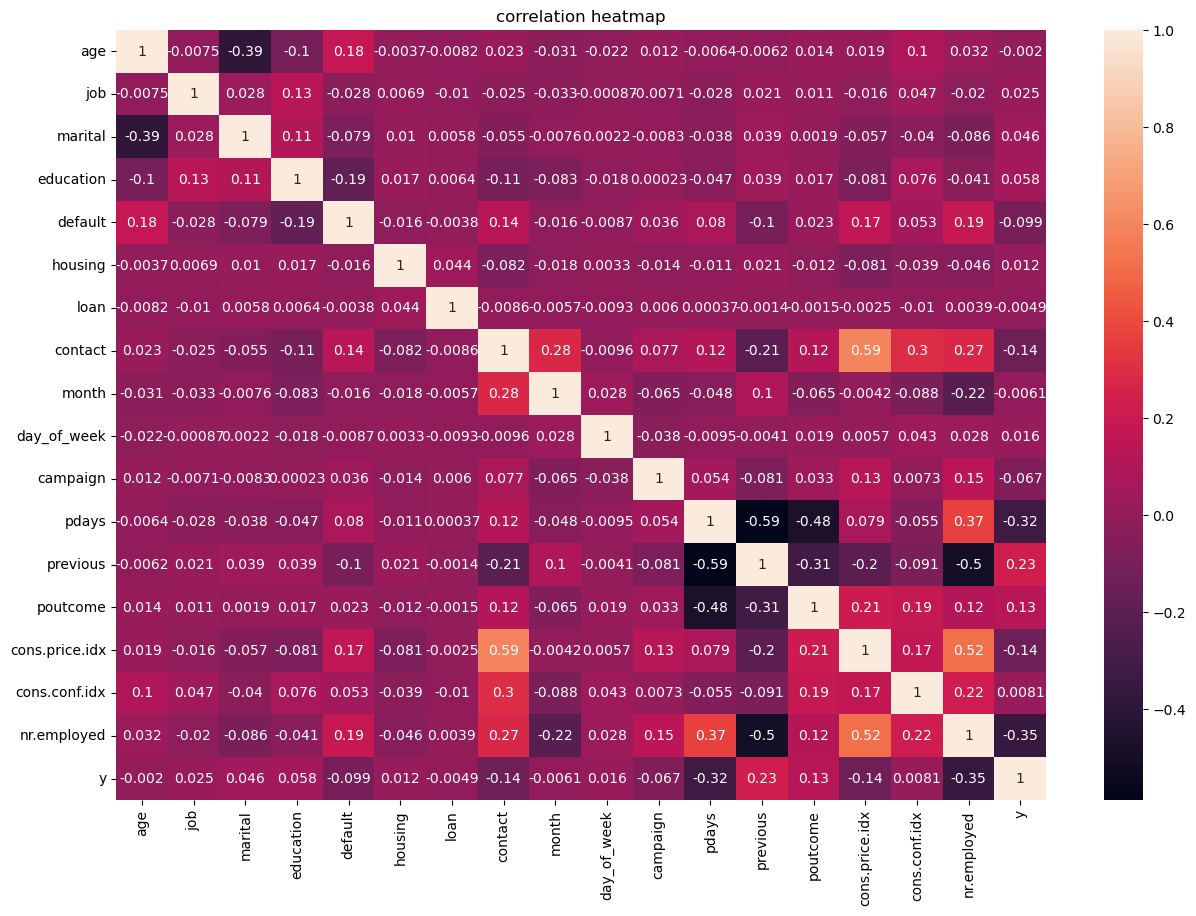

In [10]:
#Generate correlation heatmap
plt.figure(figsize=(15,10))
plt.title ('correlation heatmap')
sns.heatmap(df.corr(),annot=True)
plt.savefig('images/correlation_heat.png')


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

Business objective will be we apply a Data Mining (DM) approach to
bank direct marketing campaigns. In particular, we used
real-world and recent data from a Portuguese bank and
performed multiple iterations of the CRISP-DM methodology,
We compare and contrast  multiple models for accuracy.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int64  
 2   marital         41176 non-null  int64  
 3   education       41176 non-null  int64  
 4   default         41176 non-null  int64  
 5   housing         41176 non-null  int64  
 6   loan            41176 non-null  int64  
 7   contact         41176 non-null  int64  
 8   month           41176 non-null  int64  
 9   day_of_week     41176 non-null  int64  
 10  campaign        41176 non-null  int64  
 11  pdays           41176 non-null  int64  
 12  previous        41176 non-null  int64  
 13  poutcome        41176 non-null  int64  
 14  cons.price.idx  41176 non-null  float64
 15  cons.conf.idx   41176 non-null  float64
 16  nr.employed     41176 non-null  float64
 17  y               41176 non-null  int6

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [12]:
# create dependent and independent variable
X = df.drop(['y'],axis=1)    # Independent Variable
y = df['y']                                            # Dependent variable

In [13]:
y.value_counts()

y
0    36537
1     4639
Name: count, dtype: int64

SMOTE (Synthetic Minority Oversampling Technique) is used to address class imbalance in machine learning datasets, where one class has significantly fewer data points than another, by generating synthetic data points for the minority class, effectively balancing the dataset and allowing the model to learn more effectively from the underrepresented class

In [14]:
#from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(random_state=42)
#X_resampled, y_resampled = ros.fit_resample(X, y)
#y_resampled.value_counts()

from imblearn.over_sampling import SMOTE                                # import SMOTE from oversampling
smote = SMOTE(random_state=42)                                                         # Make a variable for SMOTE
X_smot, y_smot = smote.fit_resample(X, y)                               # Split data using smote technique
print(y_smot.value_counts())
df = pd.concat([X_smot, y_smot],axis=1)

print(df.duplicated().sum())
df = df.drop_duplicates()

X = df.drop(['y'],axis=1)    # Independent Variable
y = df['y']                                            # Dependent variable
print(y.value_counts())


y
0    36537
1    36537
Name: count, dtype: int64
14390
y
0    34232
1    24452
Name: count, dtype: int64


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [15]:
# split the data into train & test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# import Required metrics to see the performance
from sklearn.metrics import accuracy_score,classification_report,f1_score,precision_score,recall_score

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [16]:
#Build Majority Rate Classifier and print Model , Train Time , Train Accuracy,  Test Accuracy and classification_report

from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
import time

# Baseline Model
dummy_clf = DummyClassifier(strategy="most_frequent")
start_time = time.time()
dummy_clf.fit(x_train, y_train)
end_time = time.time()
train_time = end_time - start_time

train_acc = dummy_clf.score(x_train,y_train)
test_acc = dummy_clf.score(x_test,y_test)

y_pred = dummy_clf.predict(x_test)
print("Model:", dummy_clf)
print("Train Time:", train_time)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_pred))

Model: DummyClassifier(strategy='most_frequent')
Train Time: 0.0013260841369628906
Train Accuracy: 0.5840839378742879
Test Accuracy: 0.5815631034874474
              precision    recall  f1-score   support

           0       0.58      1.00      0.74     10239
           1       0.00      0.00      0.00      7367

    accuracy                           0.58     17606
   macro avg       0.29      0.50      0.37     17606
weighted avg       0.34      0.58      0.43     17606



In [17]:
# Build Linear Regression Model and print Model , Train Time , Train Accuracy,  Test Accuracy and classification_report

import time
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
model = LinearRegression()
start_time = time.time()
model.fit(x_train, y_train)
end_time = time.time()
train_time = end_time - start_time

# Make predictions on the training and testing sets
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Evaluate the model (Linear Regression doesn't have accuracy in the same way as classification models)
train_accuracy = model.score(x_train, y_train) # R-squared for regression
test_accuracy = model.score(x_test, y_test)   # R-squared for regression


print("Model:", model)
print("Train Time:", train_time)
print("Train Accuracy (R-squared):", train_accuracy)
print("Test Accuracy (R-squared):", test_accuracy)

# Classification report is not directly applicable to regression
# You could potentially bin the predictions and then generate a classification report, but that would be a different evaluation metric
#print(classification_report(y_test, y_test_pred))

Model: LinearRegression()
Train Time: 0.011207103729248047
Train Accuracy (R-squared): 0.3554095051218109
Test Accuracy (R-squared): 0.3546226506985105


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [18]:
# Build Logistic Regression Model and print Model , Train Time , Train Accuracy,  Test Accuracy and classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import time

# Initialize and train the Logistic Regression model
model = LogisticRegression()
start_time = time.time()
model.fit(x_train, y_train)
end_time = time.time()
train_time = end_time - start_time

# Make predictions on the training and testing sets
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Model:", model)
print("Train Time:", train_time)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print(classification_report(y_test, y_test_pred))

Model: LogisticRegression()
Train Time: 0.37160491943359375
Train Accuracy: 0.7590681143191003
Test Accuracy: 0.757923435192548
              precision    recall  f1-score   support

           0       0.74      0.89      0.81     10239
           1       0.79      0.57      0.66      7367

    accuracy                           0.76     17606
   macro avg       0.77      0.73      0.74     17606
weighted avg       0.76      0.76      0.75     17606



In [19]:
# Build KNN Model and print Model , Train Time , Train Accuracy,  Test Accuracy and classification_report

from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
# Problem 9: KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
start_time = time.time()
knn_model.fit(x_train, y_train)
end_time = time.time()
train_time = end_time - start_time

train_acc = knn_model.score(x_train, y_train)
test_acc = knn_model.score(x_test, y_test)

y_pred = knn_model.predict(x_test)

print("Model:", knn_model)
print("Train Time:", train_time)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_pred))

Model: KNeighborsClassifier()
Train Time: 0.011535882949829102
Train Accuracy: 0.8970982034178879
Test Accuracy: 0.8442576394410997
              precision    recall  f1-score   support

           0       0.92      0.81      0.86     10239
           1       0.77      0.90      0.83      7367

    accuracy                           0.84     17606
   macro avg       0.84      0.85      0.84     17606
weighted avg       0.85      0.84      0.85     17606



In [20]:
#  Build Support Vector Machines Model and print Model , Train Time , Train Accuracy,  Test Accuracy and classification_report

from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression

# Problem 10: SVM Classifier
svm_model = SVC(kernel='rbf',random_state=20) # You can adjust kernel (e.g., 'rbf', 'poly')
start_time = time.time()
svm_model.fit(x_train, y_train)
end_time = time.time()
train_time = end_time - start_time

train_acc = svm_model.score(x_train, y_train)
test_acc = svm_model.score(x_test, y_test)

y_pred = svm_model.predict(x_test)

print("Model:", svm_model)
print("Train Time:", train_time)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_pred))

Model: SVC(random_state=20)
Train Time: 22.204941034317017
Train Accuracy: 0.765227128876771
Test Accuracy: 0.765250482789958
              precision    recall  f1-score   support

           0       0.74      0.92      0.82     10239
           1       0.83      0.55      0.66      7367

    accuracy                           0.77     17606
   macro avg       0.79      0.74      0.74     17606
weighted avg       0.78      0.77      0.75     17606



In [21]:
#  Build Random Forest Model and print Model , Train Time , Train Accuracy,  Test Accuracy and classification_report

from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
# Problem 11: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters
start_time = time.time()
rf_model.fit(x_train, y_train)
end_time = time.time()
train_time = end_time - start_time

train_acc = rf_model.score(x_train, y_train)
test_acc = rf_model.score(x_test, y_test)

y_pred = rf_model.predict(x_test)

print("Model:", rf_model)
print("Train Time:", train_time)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_pred))

Model: RandomForestClassifier(random_state=42)
Train Time: 2.615373134613037
Train Accuracy: 0.9930132917863577
Test Accuracy: 0.8787345223219357
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     10239
           1       0.88      0.83      0.85      7367

    accuracy                           0.88     17606
   macro avg       0.88      0.87      0.87     17606
weighted avg       0.88      0.88      0.88     17606



In [22]:
# Build Decision Tree Model and print Model , Train Time , Train Accuracy,  Test Accuracy and classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
import time

# Problem 12: Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters
start_time = time.time()
dt_model.fit(x_train, y_train)
end_time = time.time()
train_time = end_time - start_time

train_acc = dt_model.score(x_train, y_train)
test_acc = dt_model.score(x_test, y_test)

y_pred = dt_model.predict(x_test)

print("Model:", dt_model)
print("Train Time:", train_time)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_pred))

Model: DecisionTreeClassifier(random_state=42)
Train Time: 0.12327814102172852
Train Accuracy: 0.9930376357174157
Test Accuracy: 0.8284675678745882
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     10239
           1       0.79      0.81      0.80      7367

    accuracy                           0.83     17606
   macro avg       0.82      0.83      0.82     17606
weighted avg       0.83      0.83      0.83     17606



### Problem  9 and 10: Model Comparisons and Accuracy

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time(sec) | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|  Baseline   |  0.003  |0.58    |0.58    |
|  Lin Reg    |  0.02   |0.35    |0.35   |
|  Log Reg    |  0.44   |0.75    |0.75   |
|  KNN   |  0.012  |0.89    |0.84    |
|  SVM   |  80  |0.76    |0.76    |
|  RF   |  9.14  |0.99    |0.87    |
|  DTree   |  0.21  |0.99    |0.82    |

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [23]:
# build Random Forest classifier with hyper parameter tuning and print accuracy and use the features age, nr.employed, cons.conf.idx, job, cons.price.idx, education

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=15)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_rf_model.predict(x_test)

# Evaluate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy with best hyperparameters: {accuracy}")

#For the specified features
features = ['age', 'nr.employed', 'cons.conf.idx', 'job', 'cons.price.idx', 'education']
X_selected = X[features]
x_train_selected, x_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=15)

grid_search_selected = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_selected.fit(x_train_selected, y_train)

best_params_selected = grid_search_selected.best_params_
best_rf_model_selected = grid_search_selected.best_estimator_

y_pred_selected = best_rf_model_selected.predict(x_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)

print(f"Best Hyperparameters (selected features): {best_params_selected}")
print(f"Accuracy with best hyperparameters (selected features): {accuracy_selected}")
print(classification_report(y_test, y_pred_selected))

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy with best hyperparameters: 0.8794161081449506
Best Hyperparameters (selected features): {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy with best hyperparameters (selected features): 0.8160286266045667
              precision    recall  f1-score   support

           0       0.81      0.89      0.85     10303
           1       0.82      0.71      0.76      7303

    accuracy                           0.82     17606
   macro avg       0.82      0.80      0.81     17606
weighted avg       0.82      0.82      0.81     17606



In [24]:
# build KNN classifier with hyper parameter tuning and print accuracy and use the features age, nr.employed, cons.conf.idx, job, cons.price.idx, education

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

#For the specified features
features = ['age', 'nr.employed', 'cons.conf.idx', 'job', 'cons.price.idx', 'education']
X_selected = X[features]
x_train_selected, x_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=15)

# Define the parameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Use GridSearchCV for hyperparameter tuning
knn_grid_search = GridSearchCV(estimator=knn_classifier, param_grid=knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(x_train_selected, y_train)

# Get the best hyperparameters and model
best_knn_params = knn_grid_search.best_params_
best_knn_model = knn_grid_search.best_estimator_

# Make predictions using the best model
y_pred_knn = best_knn_model.predict(x_test_selected)

# Evaluate the accuracy of the best model
knn_accuracy = accuracy_score(y_test, y_pred_knn)

print(f"Best Hyperparameters for KNN (selected features): {best_knn_params}")
print(f"Accuracy of KNN with best hyperparameters (selected features): {knn_accuracy}")
print(classification_report(y_test, y_pred_knn))

Best Hyperparameters for KNN (selected features): {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Accuracy of KNN with best hyperparameters (selected features): 0.7958650460070431
              precision    recall  f1-score   support

           0       0.79      0.88      0.83     10303
           1       0.80      0.67      0.73      7303

    accuracy                           0.80     17606
   macro avg       0.80      0.78      0.78     17606
weighted avg       0.80      0.80      0.79     17606



In [25]:
# build SVC with hyper parameter tuning and print accuracy and use the features age, nr.employed, cons.conf.idx, job, cons.price.idx, education

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

#For the specified features
features = ['age', 'nr.employed', 'cons.conf.idx', 'job', 'cons.price.idx', 'education']
X_selected = X[features]
x_train_selected, x_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=15)

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Create an SVC classifier
svc_classifier = SVC(random_state=15)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=svc_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_selected, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_svc_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_svc_model.predict(x_test_selected)

# Evaluate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters for SVM (selected features): {best_params}")
print(f"Accuracy of SVM with best hyperparameters (selected features): {accuracy}")
print(classification_report(y_test, y_pred))

Best Hyperparameters for SVM (selected features): {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy of SVM with best hyperparameters (selected features): 0.8046688628876519
              precision    recall  f1-score   support

           0       0.80      0.88      0.84     10303
           1       0.81      0.69      0.75      7303

    accuracy                           0.80     17606
   macro avg       0.81      0.79      0.79     17606
weighted avg       0.81      0.80      0.80     17606



In [26]:
# build Decision Tree classifier with hyper parameter tuning and print accuracy and use the features age, nr.employed, cons.conf.idx, job, cons.price.idx, education

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=15)

# Use GridSearchCV for hyperparameter tuning
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(x_train_selected, y_train)

# Get the best hyperparameters and model
best_params_dt = grid_search_dt.best_params_
best_dt_model = grid_search_dt.best_estimator_

# Make predictions using the best model
y_pred_dt = best_dt_model.predict(x_test_selected)

# Evaluate the accuracy of the best model
dt_accuracy = accuracy_score(y_test, y_pred_dt)

print(f"Best Hyperparameters for Decision Tree (selected features): {best_params_dt}")
print(f"Accuracy of Decision Tree with best hyperparameters (selected features): {dt_accuracy}")
print(classification_report(y_test, y_pred_dt))

Best Hyperparameters for Decision Tree (selected features): {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy of Decision Tree with best hyperparameters (selected features): 0.8099511530160173
              precision    recall  f1-score   support

           0       0.81      0.89      0.85     10303
           1       0.82      0.70      0.75      7303

    accuracy                           0.81     17606
   macro avg       0.81      0.79      0.80     17606
weighted avg       0.81      0.81      0.81     17606

